[![DOI](https://zenodo.org/badge/940091341.svg)](https://doi.org/10.5281/zenodo.14939868) <a href="https://www.globh2e.org.au/"><img src="https://img.shields.io/badge/ARC:Funding%20number-IC200100023-blue.svg"/></a>

# **Prospective life cycle assessment data generation**
<!-- **<div style="text-align: left; font-size: 19px;"> Prospective life cycle assessment data generation**</div> -->

<div style="text-align: left; font-size: 16px;">Michaël Lejeune<sup>a,b</sup>, Sami Kara<sup>a,b</sup>, Michael Zwicky Hauschild<sup>c,d</sup>, Sareh Sharabifarahni<sup>a</sup>, Rahman Daiyan<sup>b,e</sup></div><br>

<div style="text-align: left; font-size: 13px;"><sup>a</sup>Sustainability in Manufacturing and Life Cycle Engineering Research Group, School of Mechanical and Manufacturing Engineering, the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>b</sup>Australian Research Council Training Centre for the Global Hydrogen Economy (GlobH2e), the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>c</sup>Centre for Absolute Sustainability, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>d</sup>Division for Quantitative Sustainability Assessment (QSA), Department of Environmental and Resource Engineering, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>e</sup>School of Minerals and Energy Engineering, The University of New South Wales, Sydney 2052, Australia</div><br>

<div style="text-align: left; font-size: 13px;"> Code developer and maintainer:<a href="mailto:m.lejeune@unsw.edu.au"> Michaël Lejeune</div></a><br>


# **0. Initialisation**

In [2]:
%config InlineBackend.figure_format = "retina"
import os
import shutil
from Utils.premise_utils import *


In [3]:
ei_import(project_name="premise",version="3.9.1",system_model="cutoff")
bd.databases


ecoinvent-3.9.1-cutoff has already been imported.


Databases dictionary with 2 object(s):
	ecoinvent-3.9.1-biosphere
	ecoinvent-3.9.1-cutoff

# **2. Database creation based on REMIND SSPx-PkBudg500 scenarios**

In [4]:
PkBudg500 = NewDatabase( 
    #NOTE: Compuationally intensive and takes a while to run, it's better to run for 6 scenarios at a time
                    scenarios = [
                        #SSP1
                        {"model":"REMIND", "pathway":"SSP1-PkBudg500", "year":2025,},
                        # {"model":"REMIND", "pathway":"SSP1-PkBudg500", "year":2030,},
                        # {"model":"REMIND", "pathway":"SSP1-PkBudg500", "year":2035,},
                        # {"model":"REMIND", "pathway":"SSP1-PkBudg500", "year":2040,},
                        # {"model":"REMIND", "pathway":"SSP1-PkBudg500", "year":2045,},
                        # {"model":"REMIND", "pathway":"SSP1-PkBudg500", "year":2050,},
                        # #SSP2
                        # {"model":"REMIND", "pathway":"SSP2-PkBudg500", "year":2025,},
                        # {"model":"REMIND", "pathway":"SSP2-PkBudg500", "year":2030,},
                        # {"model":"REMIND", "pathway":"SSP2-PkBudg500", "year":2035,},
                        # {"model":"REMIND", "pathway":"SSP2-PkBudg500", "year":2040,},
                        # {"model":"REMIND", "pathway":"SSP2-PkBudg500", "year":2045,},
                        # {"model":"REMIND", "pathway":"SSP2-PkBudg500", "year":2050,},
                        # #SSP5
                        # {"model":"REMIND", "pathway":"SSP5-PkBudg500", "year":2025,},
                        # {"model":"REMIND", "pathway":"SSP5-PkBudg500", "year":2030,},
                        # {"model":"REMIND", "pathway":"SSP5-PkBudg500", "year":2035,},
                        # {"model":"REMIND", "pathway":"SSP5-PkBudg500", "year":2040,},
                        # {"model":"REMIND", "pathway":"SSP5-PkBudg500", "year":2045,},
                        # {"model":"REMIND", "pathway":"SSP5-PkBudg500", "year":2050,},
                    ],        
                    source_db="ecoinvent-3.9.1-cutoff",
                    source_version="3.9.1",
                    biosphere_name="ecoinvent-3.9.1-biosphere",
                    key=premise_key,
                    keep_source_db_uncertainty=True,
                    keep_imports_uncertainty=True,
                    quiet=True,
                )
PkBudg500.update() #update the database with IAM data
PkBudg500.write_db_to_matrices("../data/output/")


- Extracting source database
- Extracting inventories
- Fetching IAM data
Done!


Processing scenarios for all sectors: 100%|█| 1/1 [01:17<00:00, 77.11s


Done!

Write new database(s) to matrix.
Running all checks...
Minor anomalies found: check the change report.
Matrices saved in ../data/output/remind/SSP1-PkBudg500/2025.
Generate scenario report.
Report saved under /Users/mickael/Library/CloudStorage/OneDrive-UNSW/Research/Publications/Journal articles/1_Natcoms/Submission/code/export/scenario_report.
Generate change report.
Report saved under /Users/mickael/Library/CloudStorage/OneDrive-UNSW/Research/Publications/Journal articles/1_Natcoms/Submission/code.


# **3. Scenario analysis**

In [6]:
ar=PkBudg500.scenarios[0]["iam data"].data
ar.attrs={}


Text(0.5, 0, '')

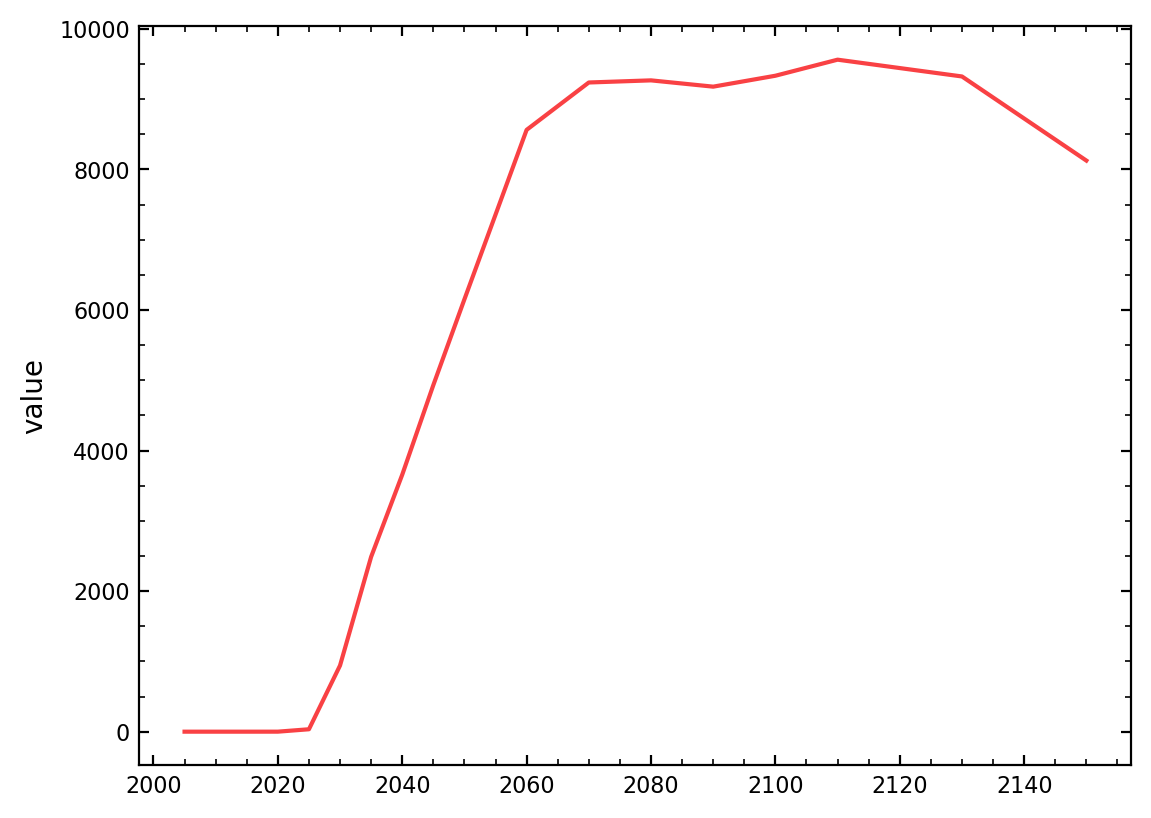

In [8]:
fig, ax = plt.subplots()
ar.sel(region="World").sel(variables="Carbon Management|Carbon Capture").plot(ax=ax)
ax.set_title("")
ax.set_xlabel("", fontproperties=font_prop_labels)


In [10]:
PkBudg500.scenarios[0]["iam data"].hydrogen_markets


<xarray.DataArray 'value' (region: 13, variables: 7, year: 19)> Size: 14kB
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.25545694e-01, 6.14758811e-01, 5.89076268e-01],
        ...,
        [7.00006122e-01, 8.73447002e-01, 9.79236188e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.99993878e-01, 1.26552998e-01, 2.07638116e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.74454306e-01, 3.85241189e-01, 4.10923732e-01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.94463076e-01],
...
        [6.99999473e-01, 8.55766565e-01, 9.75159744e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.00000527e-01, 1.44233435e-01, 2.48402558e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.16568049e-01, 6.87430775e-01, 7.11905078e-01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.10881484e-08, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.25871522e-08, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.42002063e-02, 3.38244719e-02, 5.34403472e-02],
        ...,
        [6.99999717e-01, 8.72924562e-01, 9.79789938e-01, ...,
         5.69283381e-06, 0.00000000e+00, 0.00000000e+00],
        [3.00000283e-01, 1.27075438e-01, 2.02100618e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.65793980e-01, 9.66175528e-01, 9.46559653e-01]]])
Coordinates:
  * region     (region) object 104B 'CAZ' 'CHA' 'EUR' ... 'SSA' 'USA' 'World'
  * year       (year) int64 152B 2005 2010 2015 2020 ... 2100 2110 2130 2150
  * variables  (variables) <U36 1kB 'hydrogen, from coal, with CCS' ... 'hydr...

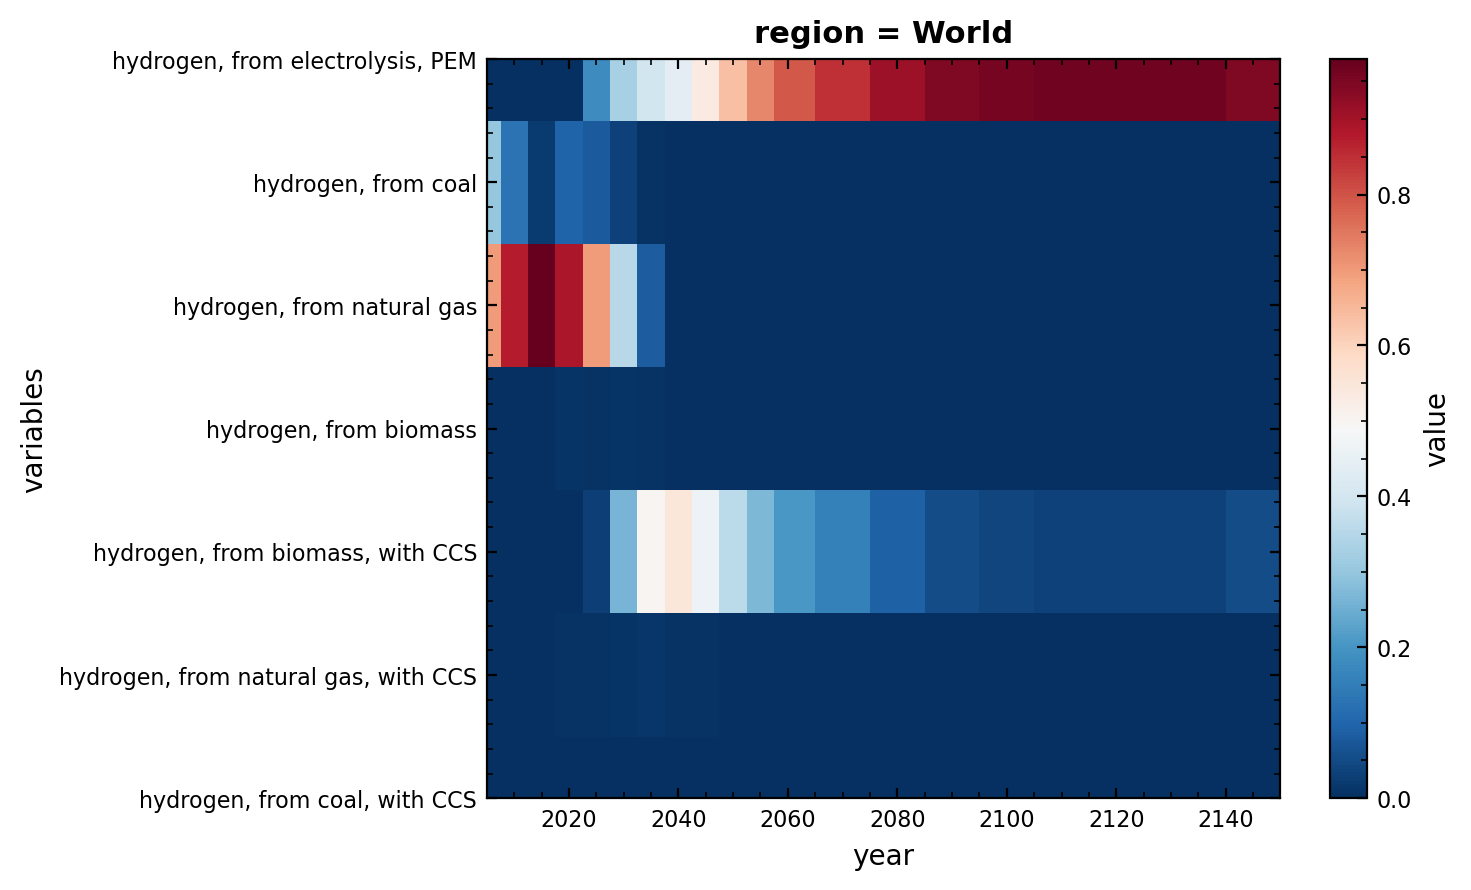

In [9]:
fig, ax = plt.subplots()
PkBudg500.scenarios[0]["iam data"].hydrogen_markets.sel(region="World").plot(ax= ax,cmap="RdBu_r")


## **Export scenario data to csv files**

In [14]:
filename=PkBudg500.scenarios[0]["model"]+"_"+PkBudg500.scenarios[0]["pathway"]+".csv"
decryptpath=os.path.join(PkBudg500.scenarios[0]["filepath"],filename)
data=get_iam_data(key=premise_key,filepath=decryptpath)
data.to_csv(filename, index=False)


In [ ]:
shutil.rmtree("./export", ignore_errors=True)
os.remove("unlinked.log")


In [ ]:
z
